In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Train = pd.read_csv("Train_merged.csv")

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Data columns (total 51 columns):
Unnamed: 0               19731 non-null int64
Agreement_ID             19731 non-null int64
Foreclosure              19731 non-null int64
Customer_ID              19731 non-null int64
MOB                      19731 non-null int64
Loan_Amt                 19731 non-null object
NET_DISBURSED_AMT        19731 non-null object
Interest_Start_Date      19731 non-null object
Current_ROI              19731 non-null float64
Original_ROI             19731 non-null float64
Current_Tenure           19731 non-null float64
Original_Tenure          19731 non-null int64
Due_Day                  19731 non-null int64
Authorization_Date       19731 non-null object
City                     19731 non-null object
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float6

In [4]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = Train.select_dtypes(include=['object'])
df_categorical.head()

,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Authorization_Date,City,Last_Receipt_Date,Product,NPA_In_Last_Month,NPA_In_Current_Month,Gender,Marital_Status,Qualification
0,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,29-Aug-10,MUMBAI,05-May-14,HL,NaN,NaN,M,M,POSTGRAD
1,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,15-Sep-10,MUMBAI,01-Nov-13,HL,NaN,NaN,M,M,POSTGRAD
2,"39,33,395.00","39,33,395.00",01-Nov-10,02-Nov-10,MUMBAI,05-Aug-17,HL,NaN,NaN,M,M,GRAD
3,"1,00,22,587.71","1,00,22,587.71",06-Oct-10,06-Oct-10,THANE,02-May-18,HL,NaN,NaN,M,M,POSTGRAD
4,"77,55,937.31","77,55,937.31",26-Oct-10,26-Oct-10,MUMBAI,05-Apr-18,HL,NaN,NaN,M,M,UG


In [5]:
TrainX_merged = pd.read_csv("TrainX_merged.csv")

In [6]:
df_categorical = df_categorical[['City','Product','Gender','Marital_Status','Qualification']]

In [14]:
df_categorical.Gender = df_categorical.Gender.astype('str')

In [16]:
df_categorical.Marital_Status = df_categorical.Marital_Status.astype('str')

In [18]:
df_categorical.Qualification = df_categorical.Qualification.astype('str')

In [19]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City,Product,Gender,Marital_Status,Qualification
0,145,0,1,0,5
1,145,0,1,0,5
2,145,0,1,0,2
3,222,0,1,0,5
4,145,0,1,0,7


In [28]:
Train_data = pd.concat([TrainX_merged, df_categorical],axis = 1)

In [30]:
Train_data = Train_data.iloc[:,1:]

In [31]:
Train_data.head(100)

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Foreclosure,Agreement_ID,Net_LTV,City,Product,Gender,Marital_Status,Qualification
0,117.10,-0.26,1.00,0.62,1,11220001,40.06,145,0,1,0,5
1,192.90,-0.29,0.28,0.24,1,11220002,84.31,145,0,1,0,5
2,39.33,-0.36,0.26,-0.73,1,11220006,50.89,145,0,1,0,2
3,100.23,-0.06,1.00,0.49,1,11220008,84.63,222,0,1,0,5
4,77.56,-0.38,0.29,-0.69,1,11220010,30.94,145,0,1,0,7
5,9.54,-0.17,0.42,-0.31,0,11220011,23.24,222,0,1,0,2
6,66.06,-0.49,0.25,-0.30,0,11220012,60.69,145,0,1,0,2
7,329.60,-0.26,0.16,-0.09,1,11220014,87.75,145,0,1,0,5
8,84.07,-0.21,0.33,-0.00,1,11220016,84.25,222,0,1,0,2
9,9.76,-0.08,0.25,-1.16,0,11220017,23.77,222,1,2,2,8


In [32]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [33]:
# Putting feature variable to X
X = Train_data.drop(['Foreclosure','Agreement_ID'],axis=1)

# Putting response variable to y
y = Train_data['Foreclosure']

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Net_LTV,City,Product,Gender,Marital_Status,Qualification
16257,13.51,-0.10,0.02,-0.17,37.83,261,1,2,2,8
7515,30.03,0.00,0.10,0.00,70.92,90,2,1,1,7
1993,23.87,0.00,0.05,0.00,54.12,90,2,0,0,5
2239,27.58,-0.04,0.22,-0.03,73.06,2,0,1,0,7
16897,15.51,0.00,0.03,0.00,85.15,247,2,2,2,8


In [35]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5354
           1       0.64      0.57      0.61       566

   micro avg       0.93      0.93      0.93      5920
   macro avg       0.80      0.77      0.78      5920
weighted avg       0.93      0.93      0.93      5920



In [37]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[5172  182]
 [ 241  325]]
0.9285472972972973


In [38]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [39]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.007514,0.001304,0.911013,0.911013,1,{'max_depth': 1},39,0.910966,0.911025,0.910966,...,0.910934,0.911033,0.910934,0.911033,0.911264,0.910950,0.000544,0.000401,0.000126,0.000032
1,0.011631,0.001598,0.927160,0.927196,2,{'max_depth': 2},37,0.923272,0.928313,0.925805,...,0.925416,0.927595,0.932657,0.925785,0.928649,0.926787,0.000736,0.000493,0.003238,0.000855
2,0.015140,0.001504,0.926653,0.929205,3,{'max_depth': 3},38,0.923272,0.928313,0.927615,...,0.926140,0.931940,0.926503,0.928953,0.929736,0.928145,0.000802,0.000317,0.002105,0.001396
3,0.018448,0.001203,0.932807,0.935124,4,{'max_depth': 4},13,0.934130,0.934920,0.927615,...,0.930847,0.936917,0.939175,0.933026,0.932271,0.934299,0.001161,0.000245,0.003831,0.001423
4,0.019746,0.001308,0.937152,0.942256,5,{'max_depth': 5},7,0.941006,0.944424,0.936301,...,0.931933,0.939361,0.939175,0.943886,0.937342,0.940814,0.000515,0.000250,0.003064,0.001903


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


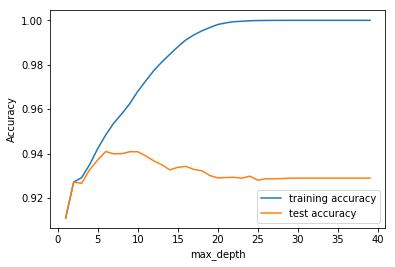

In [40]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [41]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.034103,0.001505,0.937731,0.968576,5,{'min_samples_leaf': 5},6,0.938473,0.967505,0.937387,...,0.937726,0.967689,0.939175,0.969318,0.935893,0.970226,0.002142,0.000020,0.001107,0.001039
1,0.029880,0.001804,0.941568,0.950836,25,{'min_samples_leaf': 25},1,0.940644,0.950127,0.941730,...,0.938088,0.952394,0.944243,0.950584,0.943137,0.950498,0.002967,0.000399,0.002126,0.000797
2,0.026570,0.001203,0.939758,0.946094,45,{'min_samples_leaf': 45},3,0.936663,0.946054,0.941006,...,0.938088,0.946511,0.938812,0.945877,0.944223,0.946063,0.000884,0.000246,0.002636,0.000219
3,0.025275,0.001498,0.939686,0.943903,65,{'min_samples_leaf': 65},4,0.939558,0.944696,0.942816,...,0.937002,0.942438,0.938088,0.944158,0.940963,0.944163,0.001173,0.000318,0.002059,0.000766
4,0.025256,0.001318,0.940120,0.942654,85,{'min_samples_leaf': 85},2,0.941368,0.942161,0.943540,...,0.937364,0.943977,0.938088,0.942167,0.940239,0.942986,0.001488,0.000258,0.002236,0.000748


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


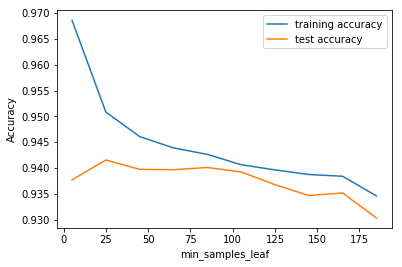

In [43]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [44]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.036597,0.001704,0.929983,0.989809,5,{'min_samples_split': 5},10,0.932682,0.990496,0.931596,...,0.930123,0.990587,0.928313,0.988596,0.927200,0.989593,0.002308,0.000511,0.002022,0.000721
1,0.034691,0.001705,0.937658,0.965607,25,{'min_samples_split': 25},9,0.937025,0.966329,0.935577,...,0.939537,0.964522,0.940261,0.966603,0.935893,0.964887,0.001598,0.000246,0.001905,0.000802
2,0.033609,0.001505,0.939469,0.958910,45,{'min_samples_split': 45},6,0.937387,0.959993,0.938473,...,0.940985,0.959453,0.940985,0.959996,0.939515,0.956109,0.001387,0.000018,0.001409,0.001449
3,0.033089,0.001303,0.939396,0.956086,65,{'min_samples_split': 65},7,0.936663,0.956372,0.940282,...,0.940261,0.957462,0.937002,0.956738,0.942774,0.955113,0.001749,0.000246,0.002287,0.001015
4,0.031391,0.001403,0.940048,0.952701,85,{'min_samples_split': 85},3,0.940644,0.952933,0.939920,...,0.938812,0.953661,0.938088,0.951579,0.942774,0.953213,0.001338,0.000585,0.001623,0.000753


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


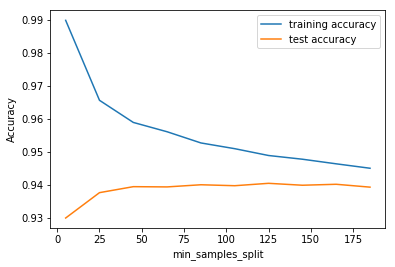

In [46]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [47]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [48]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.161511,0.006515,0.937658,0.940808,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",11,...,0.931209,0.940176,0.937364,0.941895,0.938428,0.939729,0.044493,1.764442e-03,0.004569,0.001402
1,0.097158,0.004713,0.937658,0.940808,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",11,...,0.931209,0.940176,0.937364,0.941895,0.938428,0.939729,0.068223,2.407311e-03,0.004569,0.001402
2,0.026770,0.001203,0.937007,0.939541,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.931571,0.939995,0.935554,0.939271,0.937342,0.938552,0.003733,2.455542e-04,0.004416,0.001099
3,0.021950,0.001304,0.937007,0.939541,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.931571,0.939995,0.935554,0.939271,0.937342,0.938552,0.000669,2.459440e-04,0.004416,0.001099
4,0.032179,0.001596,0.940555,0.945170,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.938812,0.946511,0.935554,0.943977,0.944223,0.945701,0.003065,3.850423e-04,0.003040,0.000902
5,0.029381,0.001309,0.940555,0.945170,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.938812,0.946511,0.935554,0.943977,0.944223,0.945701,0.000748,2.501460e-04,0.003040,0.000902
6,0.026658,0.001506,0.939758,0.942003,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",7,...,0.936278,0.943796,0.935554,0.939271,0.940963,0.942624,0.001499,5.492910e-04,0.003234,0.001495
7,0.027668,0.001209,0.939758,0.942003,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",7,...,0.936278,0.943796,0.935554,0.939271,0.940963,0.942624,0.001016,2.582152e-04,0.003234,0.001495
8,0.019753,0.001208,0.937369,0.941080,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",13,...,0.931209,0.938546,0.938088,0.942167,0.938790,0.939910,0.001129,2.513384e-04,0.003361,0.001729
9,0.019552,0.001303,0.937369,0.941080,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",13,...,0.931209,0.938546,0.938088,0.942167,0.938790,0.939910,0.000448,4.010321e-04,0.003361,0.001729


In [49]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9416407211642893
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [50]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [51]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9366554054054054